In [1]:
import tifffile as tiff
im = tiff.imread('/home/diego/Downloads/km11_dem.tif')

In [3]:
print(im.shape)

(1113, 988)


In [6]:
# watch values
print(im[0][1])

74


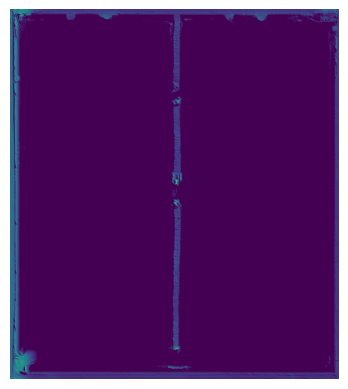

In [7]:
# show the image
import matplotlib.pyplot as plt
plt.imshow(im, cmap='viridis')
plt.axis('off')
plt.show()

Number of bands: 1
Width: 988
Height: 1113
CRS: EPSG:32719
Transform: 
| 0.27, 0.00, 564994.51|
| 0.00,-0.27, 7403354.35|
| 0.00, 0.00, 1.00|
Data type: uint16


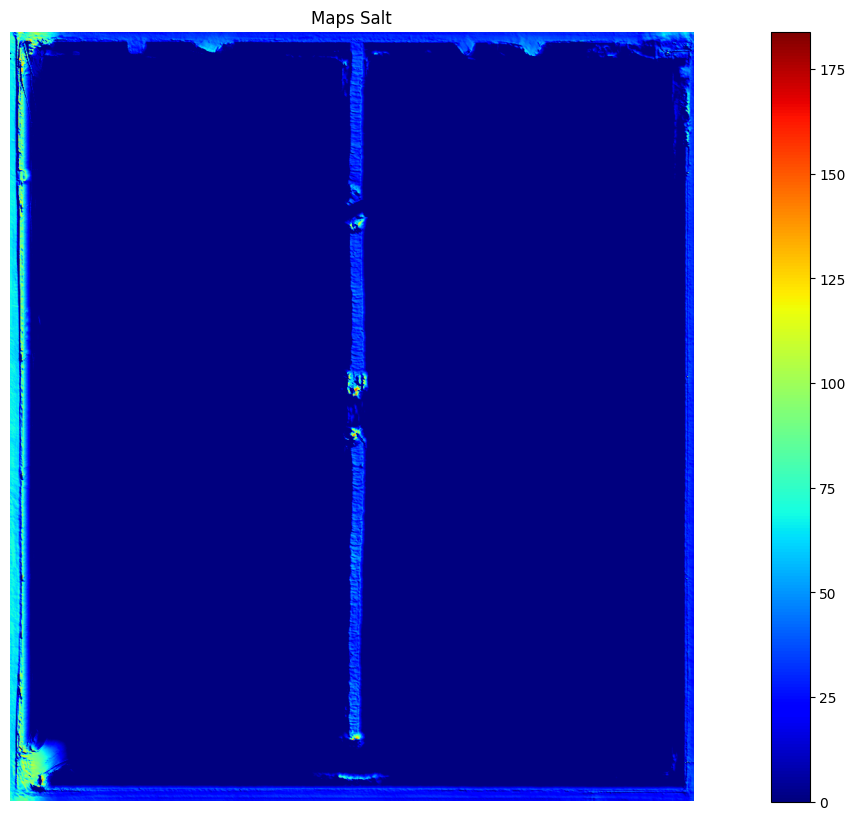

In [10]:
import rasterio
import matplotlib.pyplot as plt

tiff_path = '/home/diego/Downloads/km11_dem.tif'
output_path = f'{tiff_path.split(".")[0]}.png'

with rasterio.open(tiff_path) as src:
    data = src.read()
    
    # Print basic information about the raster
    print(f'Number of bands: {src.count}')
    print(f'Width: {src.width}')
    print(f'Height: {src.height}')
    print(f'CRS: {src.crs}')
    print(f'Transform: \n{src.transform}')
    print(f'Data type: {src.dtypes[0]}')

    # Display the image
    if src.count == 1:
        plt.figure(figsize=(20,10))
        plt.imshow(data[0], cmap='jet')
    else:
        plt.imshow(data.transpose(1, 2, 0))

    plt.title(f'Maps Salt')
    plt.colorbar()
    plt.axis('off') 
    #plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

Number of bands: 1
Width: 988
Height: 1113
CRS: EPSG:32719
Transform: 
| 0.27, 0.00, 564994.51|
| 0.00,-0.27, 7403354.35|
| 0.00, 0.00, 1.00|
Data type: uint16


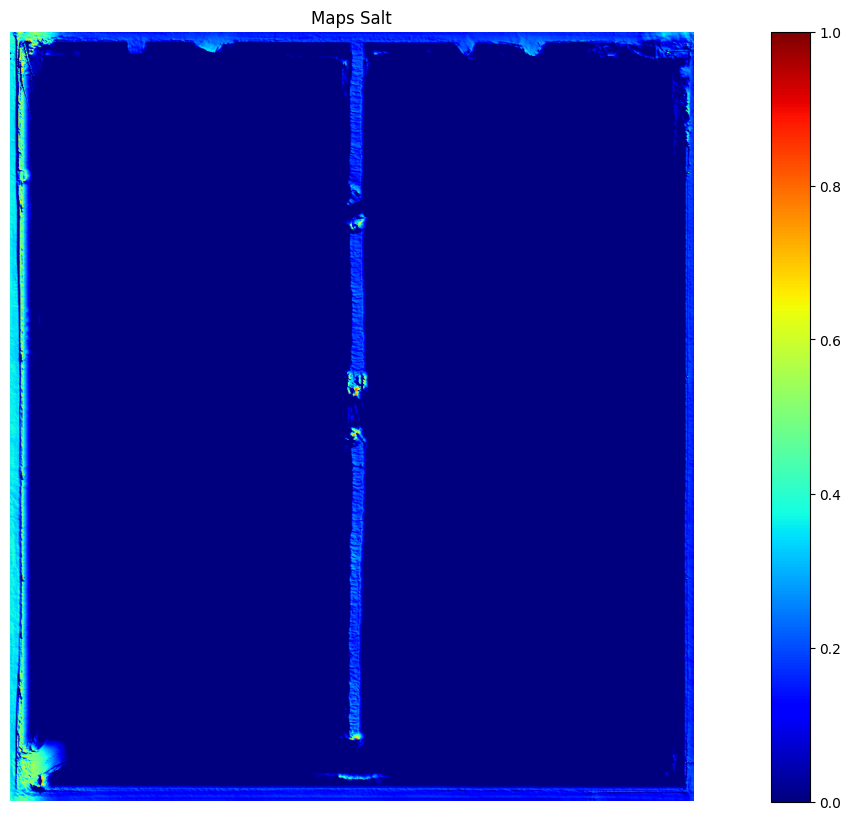

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the TIFF file
tiff_path = '/home/diego/Downloads/km11_dem.tif'
output_path = f'{tiff_path.split(".")[0]}.png'

# Open the TIFF file
with rasterio.open(tiff_path) as src:
    # Read the data
    data = src.read()

    # Print basic information about the raster
    print(f'Number of bands: {src.count}')
    print(f'Width: {src.width}')
    print(f'Height: {src.height}')
    print(f'CRS: {src.crs}')
    print(f'Transform: \n{src.transform}')
    print(f'Data type: {src.dtypes[0]}')

    # Normalize the data
    data_min = data.min()
    data_max = data.max()
    data_normalized = (data - data_min) / (data_max - data_min)

    # Convert the normalized data to float32
    data_normalized = data_normalized.astype(np.float32)

    # Display the image
    if src.count == 1:
        plt.figure(figsize=(20, 10))
        plt.imshow(data_normalized[0], cmap='jet')
    else:
        plt.imshow(data_normalized.transpose(1, 2, 0))
    plt.title(f'Maps Salt')
    plt.colorbar()
    plt.axis('off')
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()